In [31]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=113173 sha256=d2c5ad202b8563b0e292f3635420bd8635b5389f48c1cf1c538ad83fce51443e
  Stored in directory: /tmp/pip-ephem-wheel-cache-lt9mqgqs/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [3]:
import matplotlib.pyplot as plt
import straph as sg

In [4]:
plt.rcParams["figure.figsize"] = (22,15)

# Temporal Metawalks in Stream Graph

In this tutorial we will use the example below, feel free to change it (cf: Notebook on random stream graphs).

In [12]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                      path_links=path_directory + "example_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  8
Nb of segmented links :  11.0
Nb of event times :  11


<AxesSubplot:xlabel='t', ylabel='Nodes'>

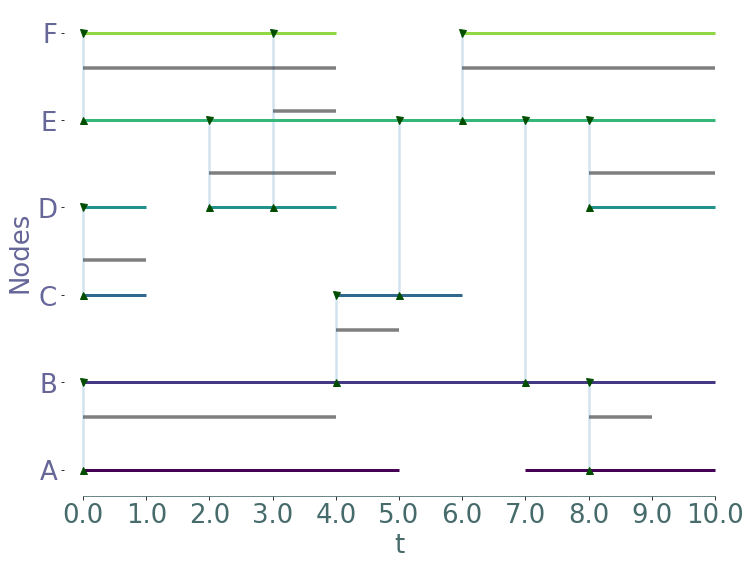

In [13]:
S.plot()

In [5]:
S.links

[(0, 1), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)]

In [6]:
S.link_presence

[[0.0, 4.0, 8.0, 9.0],
 [4.0, 5.0],
 [7.0, 7.0],
 [0.0, 1.0],
 [5.0, 5.0],
 [2.0, 4.0, 8.0, 10.0],
 [3.0, 4.0],
 [0.0, 4.0, 6.0, 10.0]]

In the following we use Straph's API to compute different types of temporal paths.

 We can consider two types of source and destination : a temporal node $(t_0,t_1,v) \in \overline{W}$ or a node $u \in V$.
Resulting in 4 types of temporal paths:

    - temporal source -> destination
    - temporal source -> temporal destination
    - source -> temporal destination
    - source -> destination

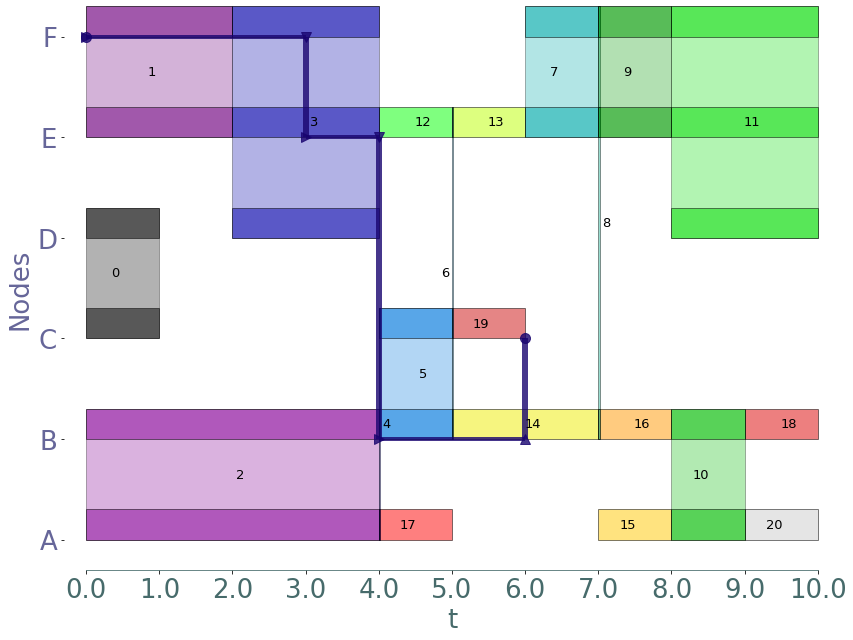

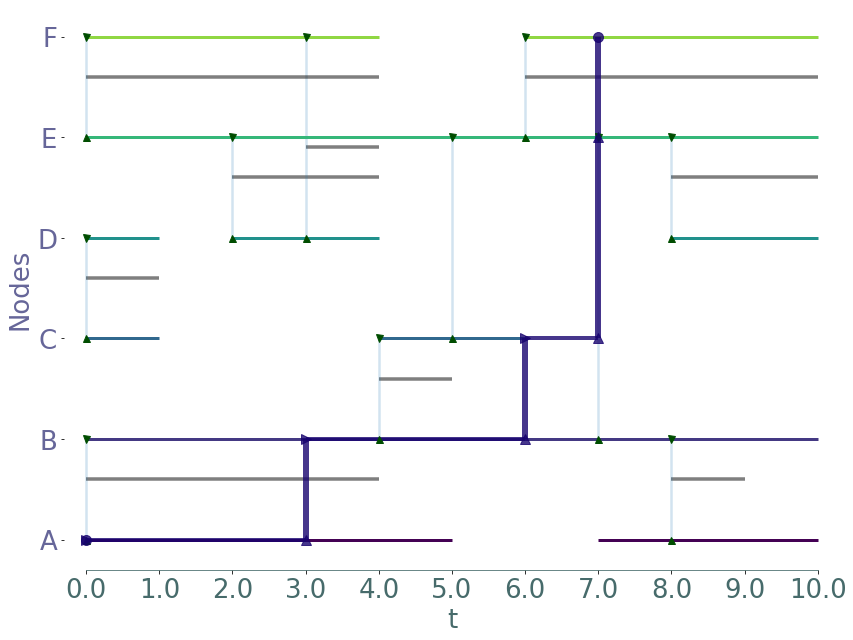

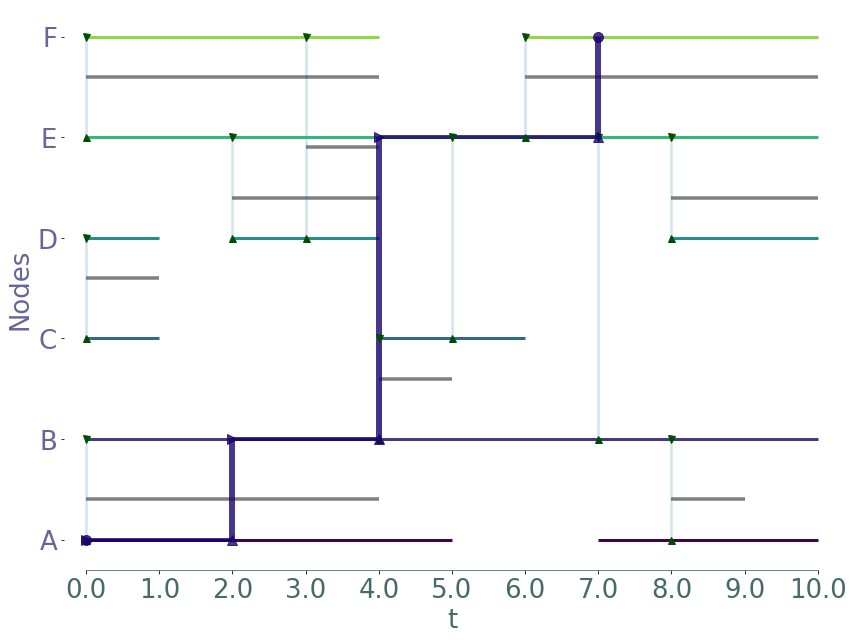

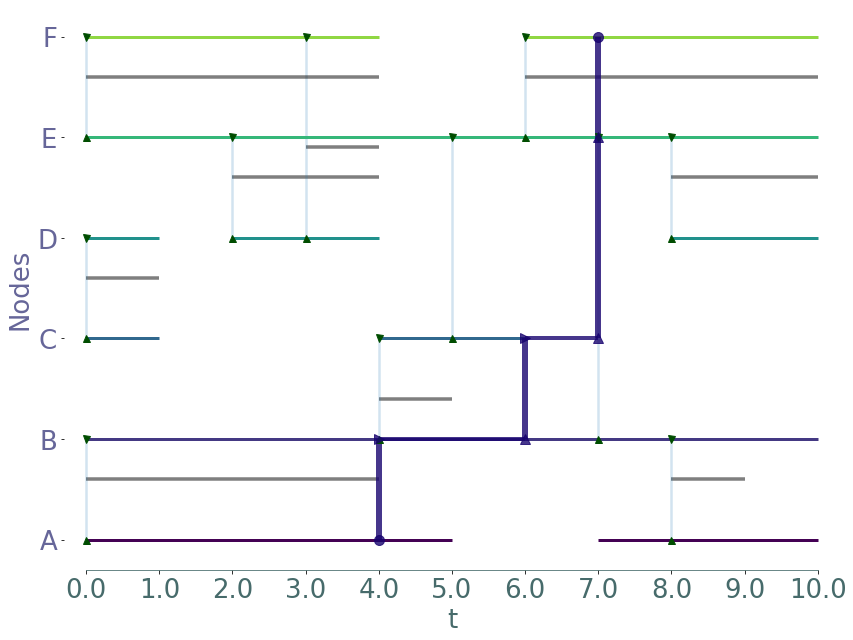

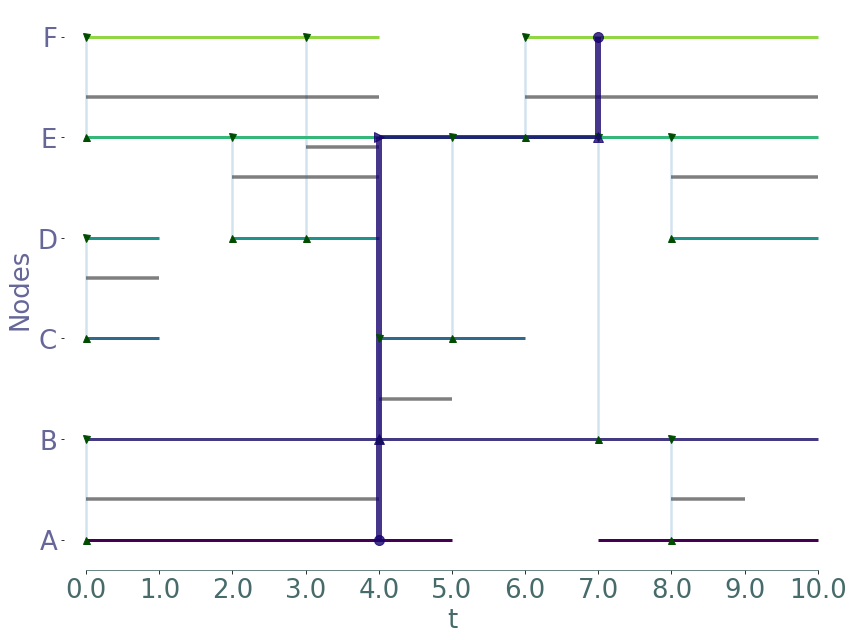

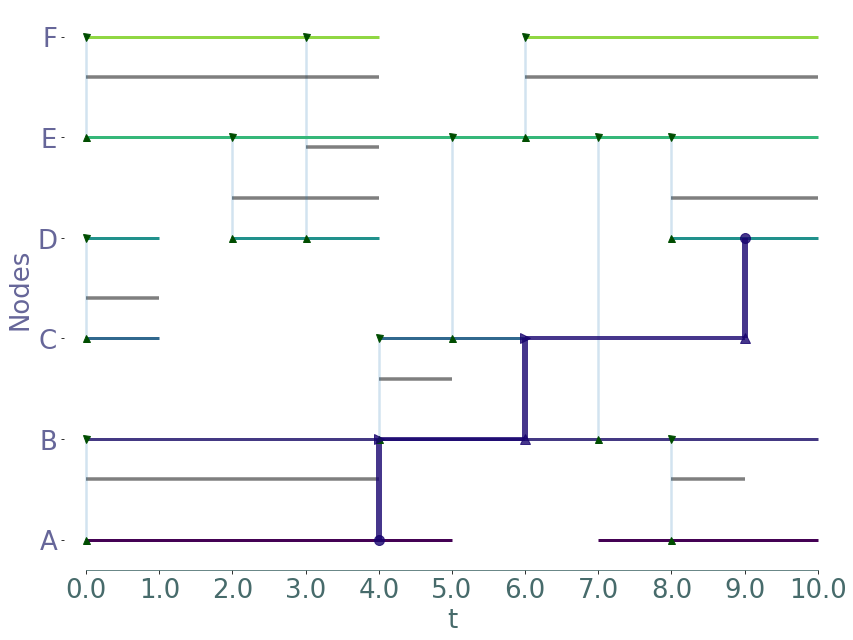

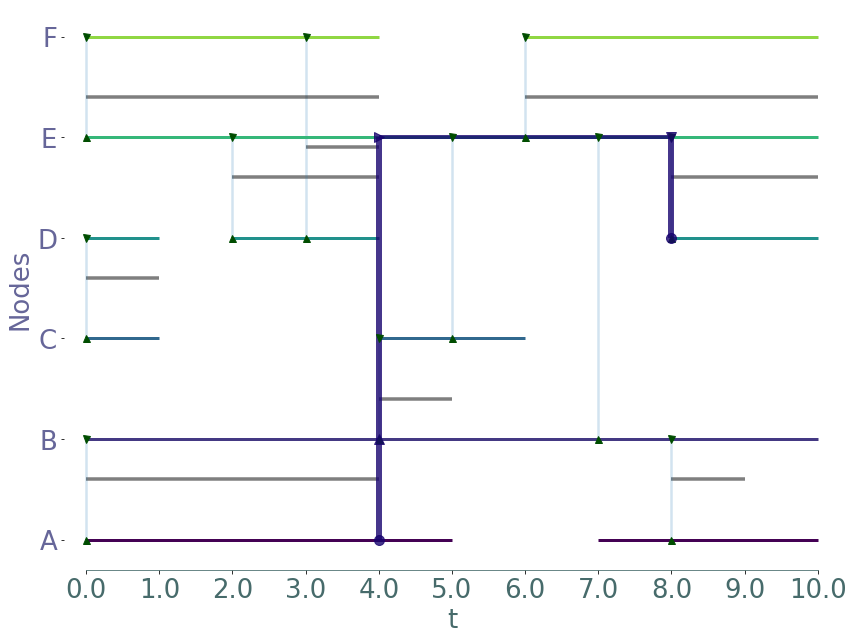

{5: 0, 4: 0.0, 3: 2.0, 2: 5.0, 1: 5.0, 0: 8.0}

In [7]:
P = sg.Path(times=[0, 3, 4, 6],
         links=[(5, 5), (5, 4), (4, 1), (1, 2)], )
P.plot(S, dag=True)

# FoP (0,A)-F
P = sg.Path(times=[0, 3, 6, 7, 7],
         links=[(0, 0), (0, 1), (1, 2), (2, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SFoP (0,A)-F
P = sg.Path(times=[0, 2, 4, 7],
         links=[(0, 0), (0, 1), (1, 4), (4, 5)], )
P.plot(S)

# FP A-F
P = sg.Path(times=[4, 6, 7, 7],
         links=[(0, 1), (1, 2), (2, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SFP A-F
P = sg.Path(times=[4, 4, 7],
         links=[(0, 1), (1, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SP A-D
P = sg.Path(times=[4, 6, 9],
         links=[(0, 1), (1, 2), (2, 3)])
P.plot(S)
# plt.show()

#  FSP A-D
P = sg.Path(times=[4, 4, 8],
         links=[(0, 1), (1, 4), (4, 3)], )
P.plot(S)
plt.show()

S.times_to_reach((0, 5, 0))


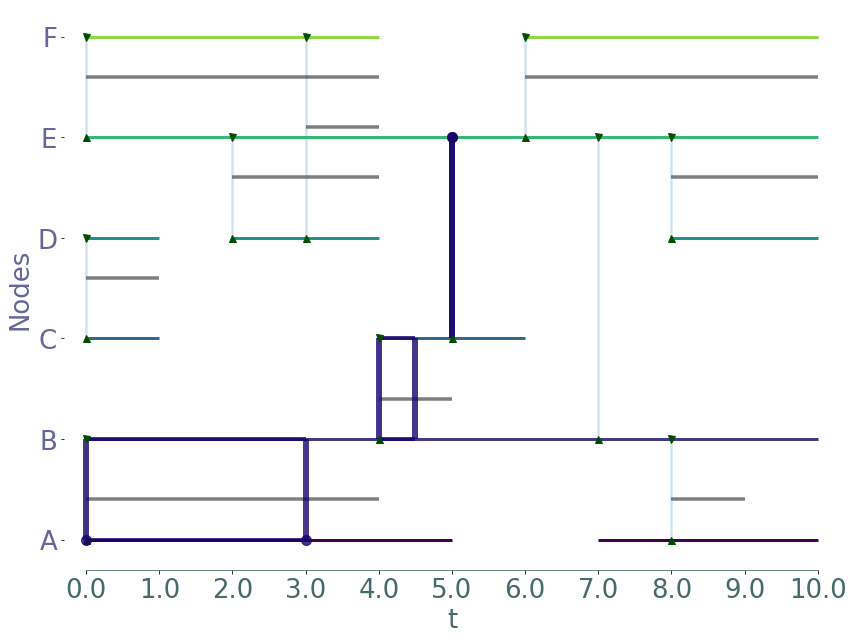

In [14]:
P = sg.Metawalk(time_intervals=[(0,3), (4,4.5), (5,5)],
         nodes=[0,1,2,4], )
P.plot(S)
plt.show()


In [16]:
print (P)

 0 (0, 3) 1 (4, 4.5) 2 (5, 5) 4


In [17]:
str(P).split(" ")

['', '0', '(0,', '3)', '1', '(4,', '4.5)', '2', '(5,', '5)', '4']

In [3]:
plt.rcParams["figure.figsize"] = (22,15)

In [1]:
import matplotlib.pyplot as plt
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "noeuds_jouet.sg",
                      path_links=path_directory + "liens_jouet.sg")
S.describe()

Nb of Nodes :  3
Nb of segmented nodes :  3.0
Nb of links :  2
Nb of segmented links :  4.0
Nb of event times :  8


In [2]:
l = S.metapaths(0)

In [3]:
for el in l:
    for e in el:
        print (e)

 0 (0.0, 2.0) 1 | volume = 0.0 + 2.0·x¹ + 0.0·x²
 0 (5.0, 6.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (5.0, 6.0) 1 (7.0, 8.0) 2 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (0.0, 2.0) 1 (7.0, 8.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (0.0, 2.0) 1 (3.0, 4.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


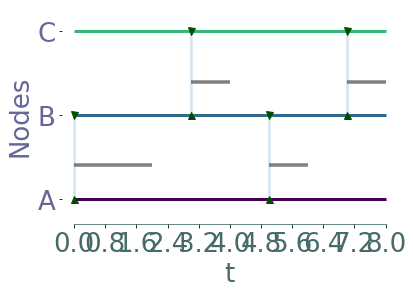

In [4]:
S.plot()

In [49]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  6
Nb of segmented links :  16.0
Nb of event times :  26


<AxesSubplot:xlabel='t', ylabel='Nodes'>

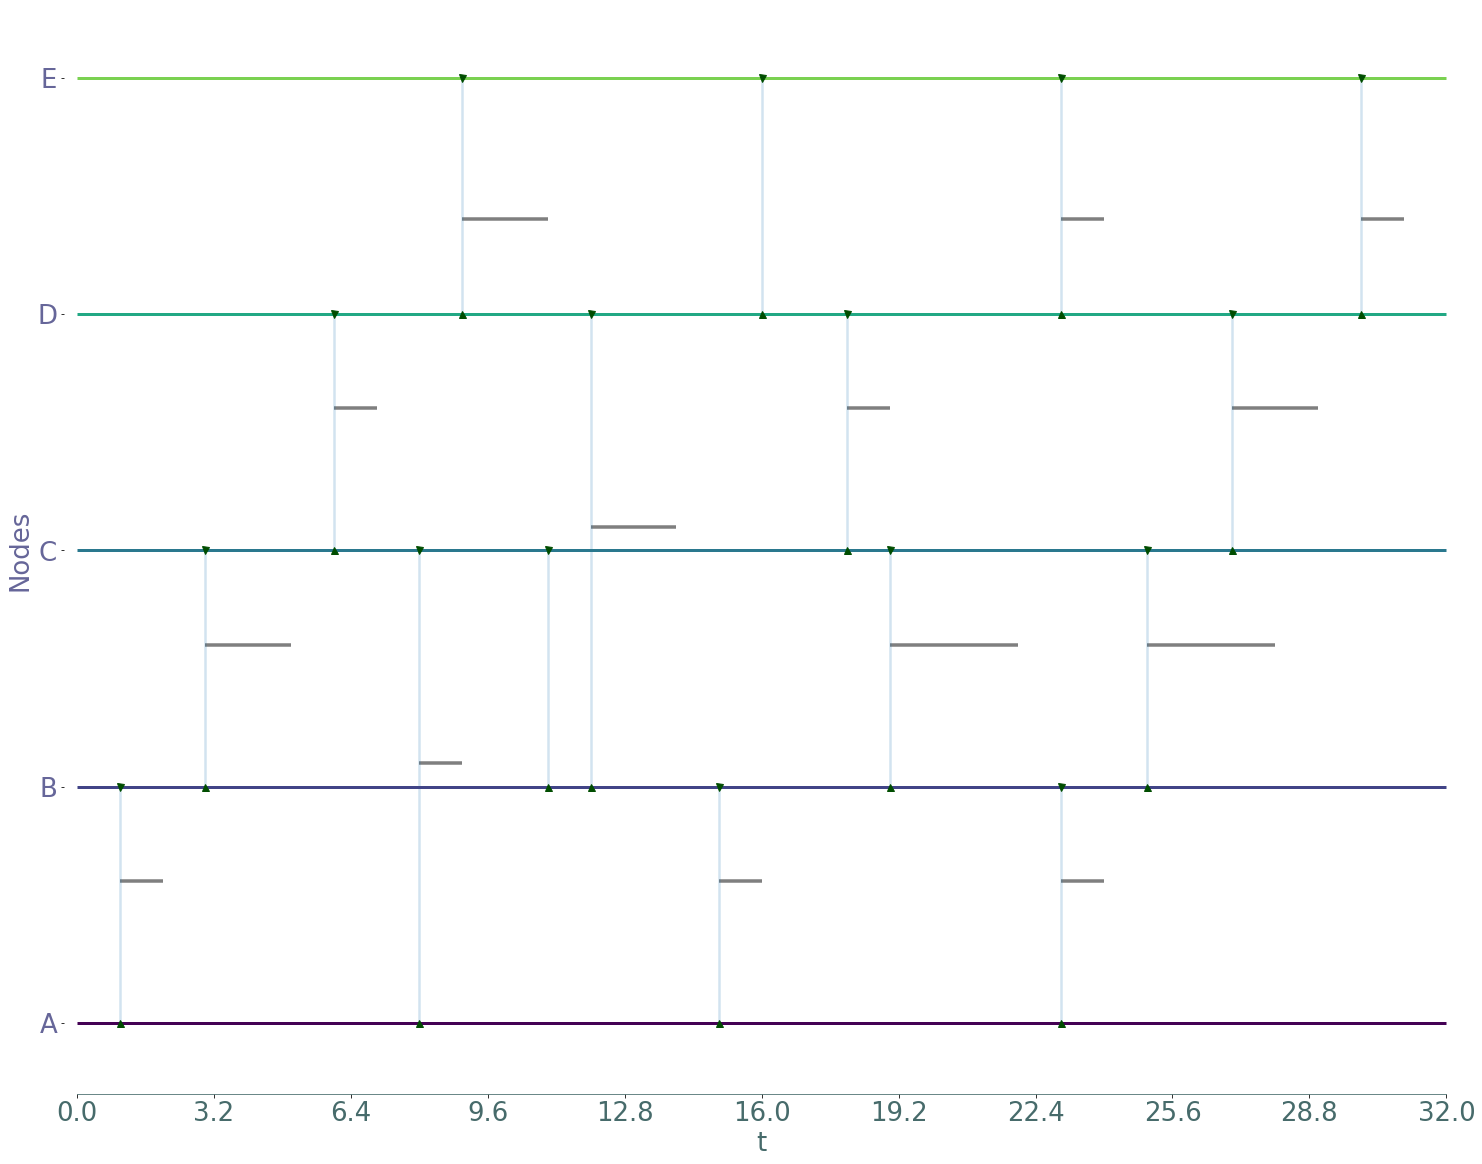

In [50]:
S.plot()

In [51]:
nouveau = S.fragmented_stream_graph()

<AxesSubplot:xlabel='t', ylabel='Nodes'>

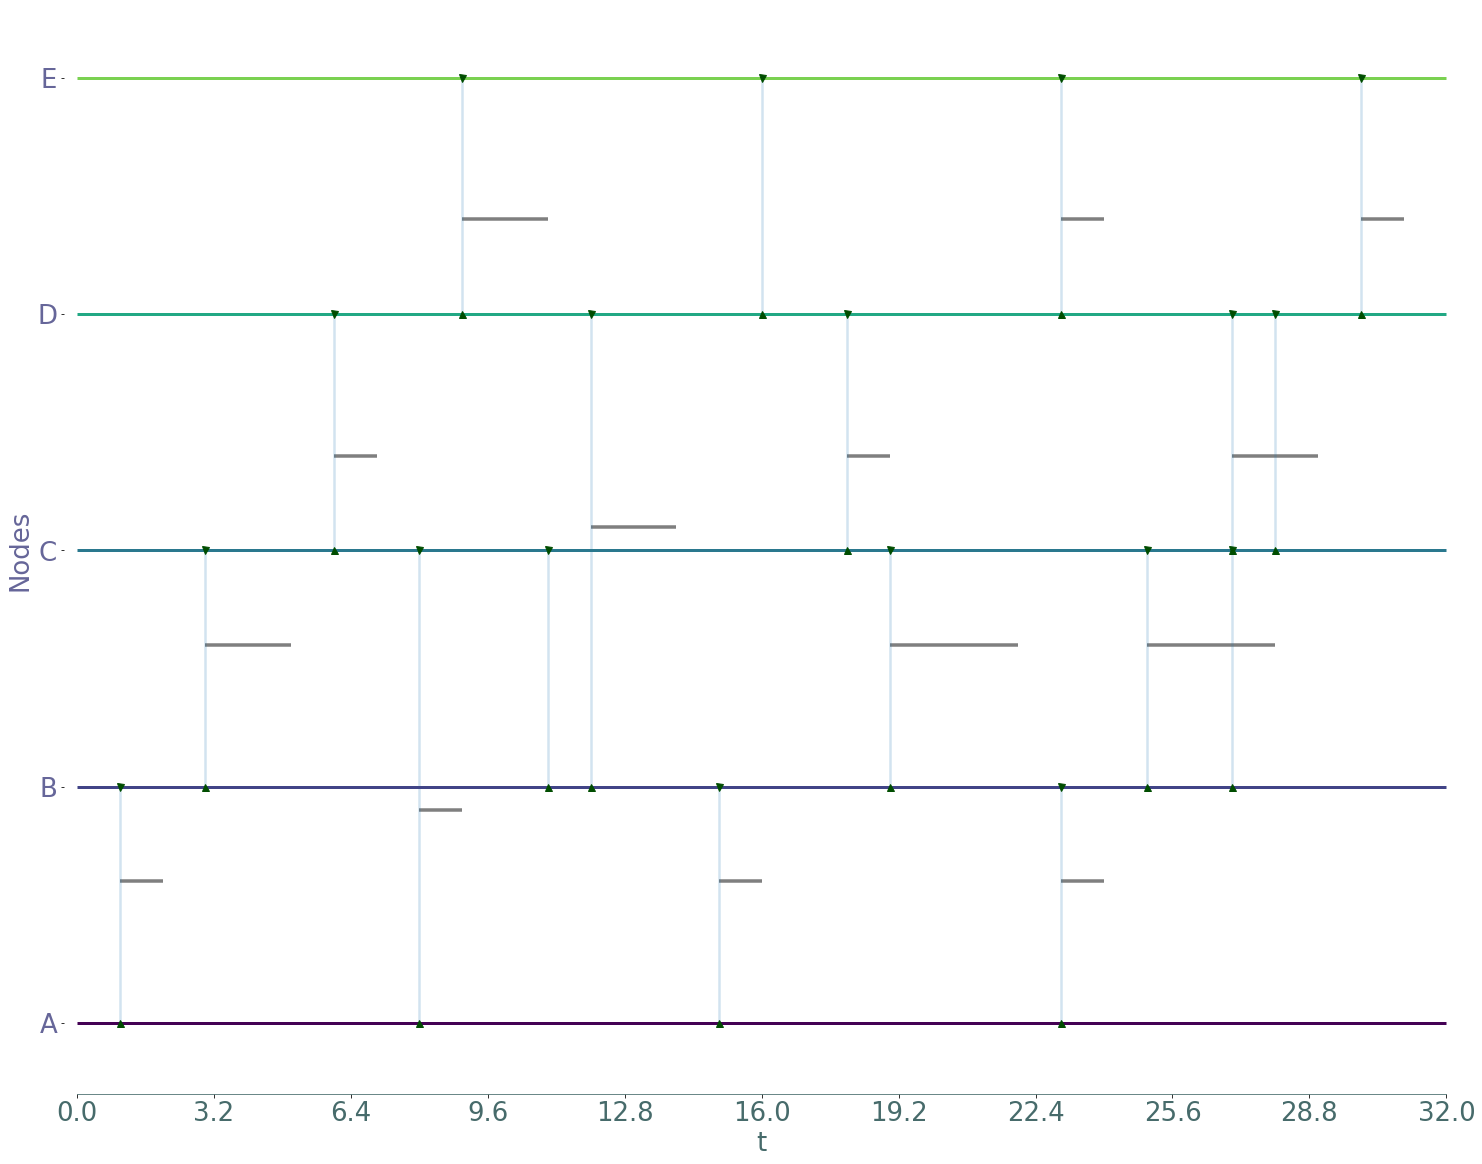

In [52]:
nouveau.plot()

In [94]:
node = 0
ll = nouveau.metapaths(node)
print("result : ")
i=0
for el in ll:
    for e in el:
        print (e)
        i += 1
print (i)

result : 
 0 (1.0, 2.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (15.0, 16.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (23.0, 24.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 (25.0, 27.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (1.0, 2.0) 1 (11.0, 11.0) 2 | volume = 0.0 + 1.0·x¹ + 0.0·x² + 0.0·x³
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (23.0, 24.0) 1 (27.0, 28.0) 2 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (1.0, 2.0) 1 (19.0, 22.0) 2 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³
 0 (23.0, 24.0) 1 (25.0, 27.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (15.0, 16.0) 1 (19.0, 22.0) 2 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³
 0 (8.0, 9.0) 2 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 (27.0, 28.0) 2 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (15.0, 16.0) 1 (25.0, 27.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (15.0, 16.0) 1 (27.0, 28.0) 2 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (15.0, 16.0) 1 (19.0, 22.0) 2 (28.0, 29.0) 3 | vo

In [95]:
ll = nouveau.filter_fastest_metapaths_slow( nouveau.metapaths(node))
print("result : ")
i=0
res = []
for el in ll:
    for e in el.values():
        for j in e:
            res.append(j)
            print (j)
            i += 1
print(i)

result : 
 0 (1.0, 2.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (15.0, 16.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (23.0, 24.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (23.0, 24.0) 1 (25.0, 27.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (15.0, 16.0) 1 (19.0, 22.0) 2 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³
 0 (8.0, 9.0) 2 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (8.0, 9.0) 2 (18.0, 19.0) 3 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (23.0, 24.0) 1 (27.0, 28.0) 2 (27.0, 28.0) 3 | volume = 0.0 + 1.0·x¹ + 0.5·x² + 0.0·x³ + 0.0·x⁴
 0 (23.0, 24.0) 1 (25.0, 27.0) 2 (27.0, 28.0) 3 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 (6.0, 7.0) 3 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 (6.0, 7.0) 3 (9.0, 11.0) 4 | volume = 0.0 + 6.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵
 0 (23.0, 24.0) 1 (27.0, 28.0) 2 (28.0, 29.0) 3 (30.0, 31.0) 4 | volume = 0.0 + 4.0·x¹ + 

In [96]:
l = nouveau.fastest_paths_from_vertex(node,0)
print("resultat : ")
res2=[]
i=0
for el in l:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res2.append(ee)
print(i)

resultat : 
 0 (1.0, 2.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (15.0, 16.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (23.0, 24.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (8.0, 9.0) 2 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (15.0, 16.0) 1 (19.0, 22.0) 2 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³
 0 (23.0, 24.0) 1 (25.0, 27.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 (6.0, 7.0) 3 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (8.0, 9.0) 2 (18.0, 19.0) 3 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (23.0, 24.0) 1 (27.0, 28.0) 2 (27.0, 28.0) 3 | volume = 0.0 + 1.0·x¹ + 0.5·x² + 0.0·x³ + 0.0·x⁴
 0 (23.0, 24.0) 1 (25.0, 27.0) 2 (27.0, 28.0) 3 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 (6.0, 7.0) 3 (9.0, 11.0) 4 | volume = 0.0 + 6.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵
 0 (8.0, 9.0) 2 (18.0, 19.0) 3 (23.0, 24.0) 4 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³

In [97]:
lll = nouveau.fastest_paths_from_vertex(node,1)
print("resultat : ")
res3=[]
i=0
for el in lll:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res3.append(ee)
print(i)

resultat : 
 0 (1.0, 2.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (15.0, 16.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (23.0, 24.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (8.0, 9.0) 2 (11.0, 11.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x² + 0.0·x³
 0 (8.0, 9.0) 2 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (15.0, 16.0) 1 (19.0, 22.0) 2 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³
 0 (23.0, 24.0) 1 (25.0, 27.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (8.0, 9.0) 2 (11.0, 11.0) 1 (12.0, 14.0) 3 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 (6.0, 7.0) 3 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (23.0, 24.0) 1 (27.0, 28.0) 2 (27.0, 28.0) 3 | volume = 0.0 + 1.0·x¹ + 0.5·x² + 0.0·x³ + 0.0·x⁴
 0 (23.0, 24.0) 1 (25.0, 27.0) 2 (27.0, 28.0) 3 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (1.0, 2.0) 1 (3.0, 5.0) 2 (6.0, 7.0) 3 (9.0, 11.0) 4 | volume = 0.0 + 6.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴

In [98]:
llll = nouveau.count_walks_paper(node)
print("resultat : ")

relaxing_paths
cur_best [{}, {1.0: (1.0, 1.0), 2.0: (2.0, 1.0), 15.0: (15.0, 1.0), 16.0: (16.0, 1.0), 23.0: (23.0, 1.0), 24.0: (24.0, 1.0)}, {8.0: (8.0, 1.0), 9.0: (9.0, 1.0)}, {}, {}]
pre [{}, {1.0: {(0, 0.0): (1.0, 1.0)}, 2.0: {(0, 0.0): (1.0, 2.0)}, 15.0: {(0, 0.0): (15.0, 15.0)}, 16.0: {(0, 0.0): (15.0, 16.0)}, 23.0: {(0, 0.0): (23.0, 23.0)}, 24.0: {(0, 0.0): (23.0, 24.0)}}, {8.0: {(0, 0.0): (8.0, 8.0)}, 9.0: {(0, 0.0): (8.0, 9.0)}}, {}, {}]
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0]
1 2 3.0 5.0
cur_best [{}, {1.0: (1.0, 1.0), 2.0: (2.0, 1.0), 15.0: (15.0, 1.0), 16.0: (16.0, 1.0), 23.0: (23.0, 1.0), 24.0: (24.0, 1.0), 3.0: (2.0, 1.0), 5.0: (2.0, 1.0)}, {8.0: (8.0, 1.0), 9.0: (9.0, 1.0)}, {}, {}]
pre [{}, {1.0: {(0, 0.0): (1.0, 1.0)}, 2.0: {(0, 0.0): (1.0, 2.0)}, 15.0: {(0, 0.0): (15.0, 15.0)}, 16.0: {(0, 0.0): (15.0, 16.0)}, 23.0: {(0, 0.0): (23.0, 23.0)}, 24.0: {(0, 0.0): (23.0, 24.0)}, 3.0: {}, 5.0: {}}, {8.0: {(0, 0.0): (8.0, 8.0)}, 9.0: {(0, 0.0): (8.0, 9.0)}}, {}, {}]
arrival

arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge 11.0 -1 (11.0, 11.0) (11.0, 11.0)
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge 11.0 -1 (11.0, 11.0) (11.0, 11.0)
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge 11.0 -1 (11.0, 11.0) -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -

edge 5.0 -1 (5.0, 5.0) -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
2 1 3.0 5.0
cur_best [

edge 16.0 -1 (16.0, 16.0) (16.0, 16.0)
arrivals [12.0, 14.0, 6.0, 7.0, 18.0, 19.0, 27.0, 28.0, 29.0, 9.0, 11.0, 16.0, 23.0, 24.0, 30.0, 31.0]
edge -1 -1 -1 -1
arrivals [12.0, 14.0, 6.0, 7.0, 18.0, 19.0, 27.0, 28.0, 29.0, 9.0, 11.0, 16.0, 23.0, 24.0, 30.0, 31.0]
edge -1 -1 -1 -1
arrivals [12.0, 14.0, 6.0, 7.0, 18.0, 19.0, 27.0, 28.0, 29.0, 9.0, 11.0, 16.0, 23.0, 24.0, 30.0, 31.0]
edge -1 -1 -1 -1
arrivals [12.0, 14.0, 6.0, 7.0, 18.0, 19.0, 27.0, 28.0, 29.0, 9.0, 11.0, 16.0, 23.0, 24.0, 30.0, 31.0]
edge -1 -1 -1 -1
arrivals [12.0, 14.0, 6.0, 7.0, 18.0, 19.0, 27.0, 28.0, 29.0, 9.0, 11.0, 16.0, 23.0, 24.0, 30.0, 31.0]
edge -1 -1 -1 -1
arrivals [12.0, 14.0, 6.0, 7.0, 18.0, 19.0, 27.0, 28.0, 29.0, 9.0, 11.0, 16.0, 23.0, 24.0, 30.0, 31.0]
edge 16.0 -1 (16.0, 16.0) (16.0, 16.0)
arrivals [12.0, 14.0, 6.0, 7.0, 18.0, 19.0, 27.0, 28.0, 29.0, 9.0, 11.0, 16.0, 23.0, 24.0, 30.0, 31.0]
edge 16.0 -1 (16.0, 16.0) (16.0, 16.0)
arrivals [12.0, 14.0, 6.0, 7.0, 18.0, 19.0, 27.0, 28.0, 29.0, 9.0, 11.0, 16.0

arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge 11.0 -1 (11.0, 11.0) (11.0, 11.0)
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge -1 -1 -1 -1
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge 11.0 -1 (11.0, 11.0) (11.0, 11.0)
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]
edge 11.0 -1 (11.0, 11.0) (11.0, 11.0)
arrivals [1.0, 2.0, 15.0, 16.0, 23.0, 24.0, 3.0, 5.0, 11.0, 19.0, 22.0, 25.0, 27.0, 28.0, 12.0, 14.0]

In [99]:
#cur_best
print(llll[1][5])

IndexError: list index out of range

In [ ]:
#pre
print(llll[0][5])

In [100]:
#cur_best
print(llll[1][4])

{9.0: (2.0, 4.0), 11.0: (2.0, 4.0), 16.0: (9.0, 4.0), 23.0: (16.0, 4.0), 24.0: (16.0, 4.0), 30.0: (24.0, 4.0), 31.0: (24.0, 4.0)}


In [101]:
#pre
print(llll[0][4])

{9.0: {(3, 6.0): (9.0, 9.0), (3, 7.0): (9.0, 9.0), (3, 9.0): (9.0, 9.0)}, 11.0: {(3, 6.0): (9.0, 11.0), (3, 7.0): (9.0, 11.0), (3, 9.0): (9.0, 11.0), (3, 11.0): (11.0, 11.0)}, 16.0: {(3, 12.0): (16.0, 16.0), (3, 14.0): (16.0, 16.0), (3, 16.0): (16.0, 16.0)}, 23.0: {(3, 19.0): (23.0, 23.0), (3, 23.0): (23.0, 23.0)}, 24.0: {(3, 19.0): (23.0, 24.0), (3, 23.0): (23.0, 24.0), (3, 24.0): (24.0, 24.0)}, 30.0: {(3, 27.0): (30.0, 30.0), (3, 28.0): (30.0, 30.0), (3, 29.0): (30.0, 30.0), (3, 30.0): (30.0, 30.0)}, 31.0: {(3, 27.0): (30.0, 31.0), (3, 28.0): (30.0, 31.0), (3, 29.0): (30.0, 31.0), (3, 30.0): (30.0, 31.0), (3, 31.0): (31.0, 31.0)}}


In [102]:
#cur_best
print(llll[1][3])

{12.0: (9.0, 3.0), 14.0: (9.0, 3.0), 6.0: (2.0, 3.0), 7.0: (2.0, 3.0), 18.0: (9.0, 2.0), 19.0: (16.0, 3.0), 27.0: (24.0, 3.0), 28.0: (24.0, 3.0), 29.0: (24.0, 3.0), 9.0: (2.0, 3.0), 11.0: (2.0, 3.0), 16.0: (9.0, 3.0), 23.0: (16.0, 3.0), 24.0: (16.0, 3.0), 30.0: (24.0, 3.0), 31.0: (24.0, 3.0)}


In [103]:
#pre
print(llll[0][3])

{12.0: {(1, 11.0): (12.0, 12.0), (1, 12.0): (12.0, 12.0)}, 14.0: {(1, 11.0): (12.0, 14.0), (1, 12.0): (12.0, 14.0), (1, 14.0): (14.0, 14.0)}, 6.0: {(2, 3.0): (6.0, 6.0), (2, 5.0): (6.0, 6.0), (2, 6.0): (6.0, 6.0)}, 7.0: {(2, 3.0): (6.0, 7.0), (2, 5.0): (6.0, 7.0), (2, 6.0): (6.0, 7.0), (2, 7.0): (7.0, 7.0)}, 18.0: {(2, 9.0): (18.0, 18.0), (2, 11.0): (18.0, 18.0), (2, 18.0): (18.0, 18.0)}, 19.0: {(2, 19.0): (19.0, 19.0)}, 27.0: {(2, 25.0): (27.0, 27.0), (2, 27.0): (27.0, 27.0)}, 28.0: {(2, 25.0): (27.0, 28.0), (2, 27.0): (27.0, 28.0), (2, 28.0): (28.0, 28.0)}, 29.0: {(2, 25.0): (28.0, 29.0), (2, 27.0): (28.0, 29.0), (2, 28.0): (28.0, 29.0)}, 9.0: {}, 11.0: {}, 16.0: {}, 23.0: {}, 24.0: {}, 30.0: {}, 31.0: {}}


In [104]:
#cur_best
print(llll[1][2])

{8.0: (8.0, 1.0), 9.0: (9.0, 1.0), 3.0: (2.0, 2.0), 5.0: (2.0, 2.0), 11.0: (9.0, 1.0), 19.0: (16.0, 2.0), 22.0: (16.0, 2.0), 25.0: (24.0, 2.0), 27.0: (24.0, 2.0), 28.0: (24.0, 2.0), 6.0: (2.0, 2.0), 7.0: (2.0, 2.0), 18.0: (9.0, 1.0), 29.0: (24.0, 4.0)}


In [105]:
#pre
print(llll[0][2])

{8.0: {(0, 0.0): (8.0, 8.0)}, 9.0: {(0, 0.0): (8.0, 9.0)}, 3.0: {(1, 2.0): (3.0, 3.0), (1, 3.0): (3.0, 3.0)}, 5.0: {(1, 2.0): (3.0, 5.0), (1, 3.0): (3.0, 5.0), (1, 5.0): (5.0, 5.0)}, 11.0: {}, 19.0: {(1, 16.0): (19.0, 19.0), (1, 19.0): (19.0, 19.0)}, 22.0: {(1, 16.0): (19.0, 22.0), (1, 19.0): (19.0, 22.0), (1, 22.0): (22.0, 22.0)}, 25.0: {(1, 24.0): (25.0, 25.0), (1, 25.0): (25.0, 25.0)}, 27.0: {(1, 24.0): (25.0, 27.0), (1, 25.0): (25.0, 27.0), (1, 27.0): (27.0, 27.0)}, 28.0: {(1, 24.0): (27.0, 28.0), (1, 25.0): (27.0, 28.0), (1, 27.0): (27.0, 28.0)}, 6.0: {}, 7.0: {}, 18.0: {}, 29.0: {(3, 27.0): (28.0, 29.0), (3, 28.0): (28.0, 29.0), (3, 29.0): (29.0, 29.0)}}


In [106]:
#cur_best
print(llll[1][1])

{1.0: (1.0, 1.0), 2.0: (2.0, 1.0), 15.0: (15.0, 1.0), 16.0: (16.0, 1.0), 23.0: (23.0, 1.0), 24.0: (24.0, 1.0), 3.0: (2.0, 1.0), 5.0: (2.0, 1.0), 11.0: (9.0, 2.0), 19.0: (16.0, 1.0), 22.0: (16.0, 1.0), 25.0: (24.0, 1.0), 27.0: (24.0, 1.0), 28.0: (24.0, 3.0), 12.0: (9.0, 2.0), 14.0: (9.0, 2.0)}


In [107]:
#pre
print(llll[0][1])

{1.0: {(0, 0.0): (1.0, 1.0)}, 2.0: {(0, 0.0): (1.0, 2.0)}, 15.0: {(0, 0.0): (15.0, 15.0)}, 16.0: {(0, 0.0): (15.0, 16.0)}, 23.0: {(0, 0.0): (23.0, 23.0)}, 24.0: {(0, 0.0): (23.0, 24.0)}, 3.0: {}, 5.0: {}, 11.0: {(2, 9.0): (11.0, 11.0), (2, 11.0): (11.0, 11.0)}, 19.0: {}, 22.0: {}, 25.0: {}, 27.0: {}, 28.0: {(2, 25.0): (27.0, 28.0), (2, 27.0): (27.0, 28.0), (2, 28.0): (28.0, 28.0)}, 12.0: {}, 14.0: {}}


In [108]:
#cur_best
print(llll[1][0])

{}


In [109]:
#pre
print(llll[0][0])

{}


In [110]:
lat = nouveau.latencies(llll[1])

In [114]:
nouveau.contribution_each_latency(lat)[4]

{9.0: (0, 30.0), 16.0: (0, 30.0), 23.0: (0, 30.0), 30.0: (0, 32.0)}

In [115]:
lat[4]

{9.0: (2.0, 4.0), 16.0: (9.0, 4.0), 23.0: (16.0, 4.0), 30.0: (24.0, 4.0)}

In [116]:
G = nouveau.predecessor_graph(llll[0])

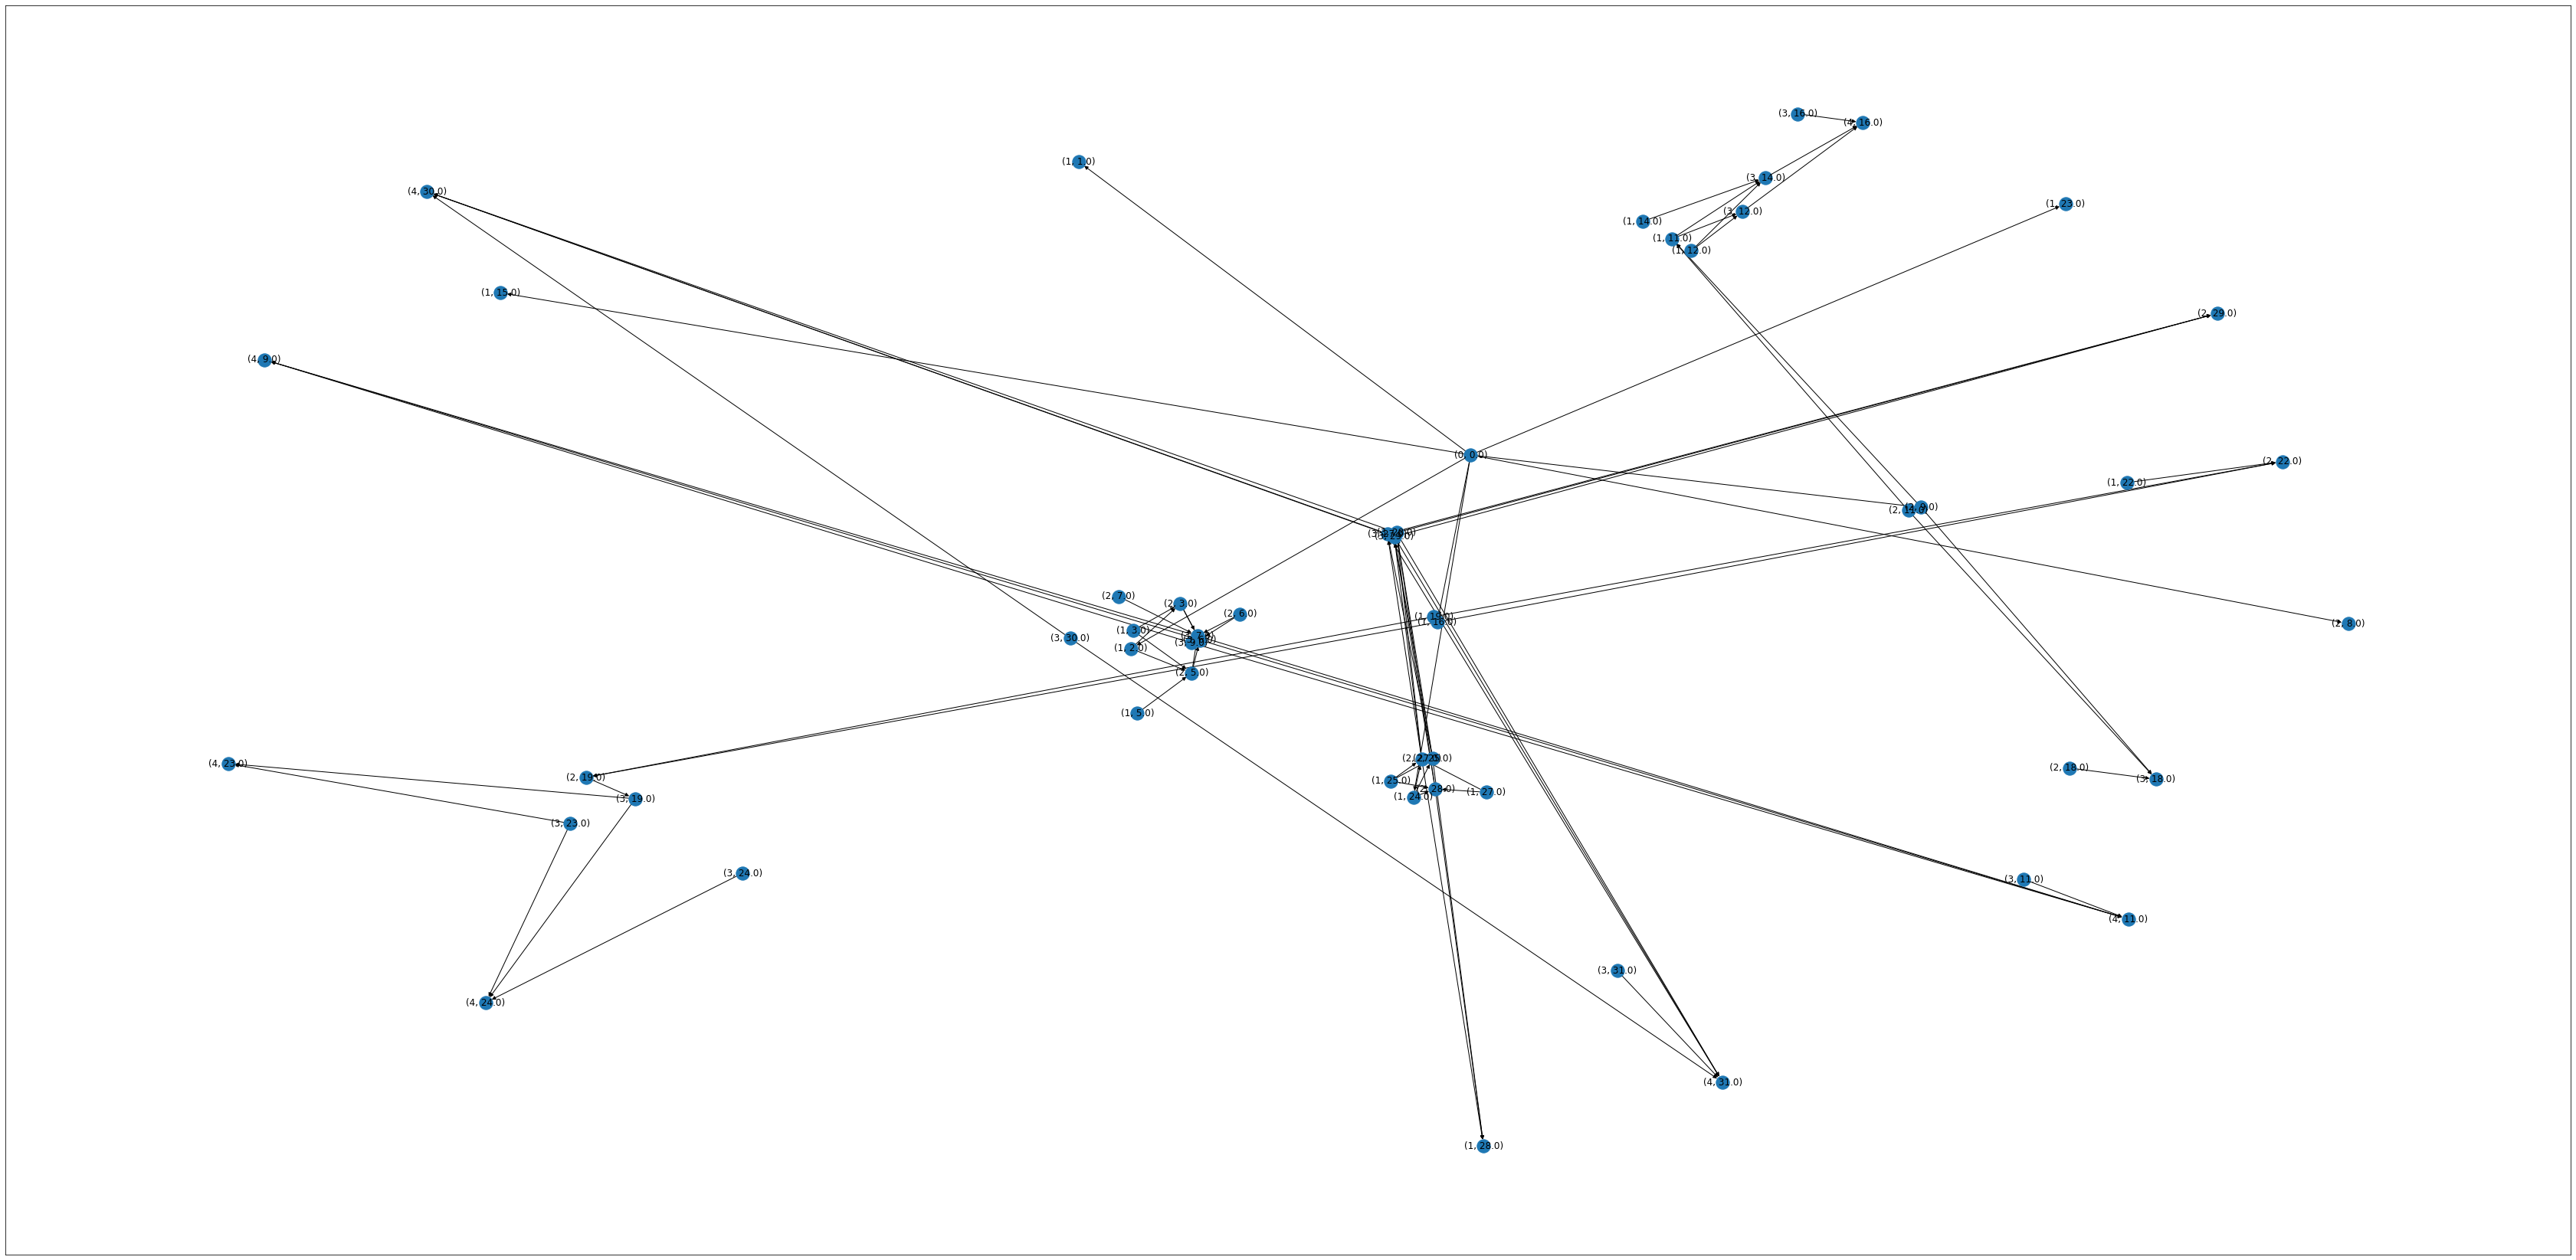

In [117]:
import networkx as nx
fig, ax = plt.subplots(figsize=(60,30))
nx.draw_networkx(G,arrows=True,width = 1,ax = ax)

In [118]:
G[(0,0.0)][(1,24.0)]

{'interval': (23.0, 24.0)}

In [119]:
len(list(nx.simple_cycles(G)))

0

In [124]:
for e in nx.all_simple_paths(G,(0,0.0),(4,16.0)):
    print(e)

[(0, 0.0), (2, 9.0), (1, 11.0), (3, 12.0), (4, 16.0)]
[(0, 0.0), (2, 9.0), (1, 11.0), (3, 14.0), (4, 16.0)]


In [125]:
paths = nx.all_simple_paths(G,(0,0.0),(4,16.0))
for path in map(nx.utils.pairwise, paths):
    #print(list(path))
    for e in path:
        print(G[e[0]][e[1]]['interval'],end="")
    print("")
    

(8.0, 9.0)(11.0, 11.0)(12.0, 12.0)(16.0, 16.0)
(8.0, 9.0)(11.0, 11.0)(12.0, 14.0)(16.0, 16.0)


In [31]:
for e in res:
    if e not in res2:
        print(e)

In [32]:
for e in res2:
    if e not in res:
        print(e)

In [33]:
for e in res:
    if e not in res3:
        print(e)

NameError: name 'res3' is not defined

In [13]:
for e in res3:
    if e not in res:
        print(e)

 0 (0.0, 1.0) 5 | volume = 0.0 + 1.0·x¹ + 0.0·x²


In [35]:
for e in res3:
    print(e)
    print("=>",e.fastest_meta_walk())

NameError: name 'res3' is not defined

In [16]:
for e in res3:
    print(e.fastest_meta_walk())

 0 (0.0, 1.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (2.1, 2.4) 1 | volume = 0.0 + 0.3·x¹ + 0.0·x²
 0 (5.0, 6.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (6.0, 7.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 (1.0, 2.0) 2 | volume = 0.0 + 0.0·x¹ + 0.5·x² + 0.0·x³
 0 (2.1, 2.4) 1 (2.1, 2.4) 2 | volume = 0.0 + 0.0·x¹ + 0.15·x² + 0.0·x³
 0 (6.0, 7.0) 1 (6.0, 7.0) 2 | volume = 0.0 + 0.0·x¹ + 0.5·x² + 0.0·x³
 0 (3.5, 4.0) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (2.0, 2.0) 1 (2.0, 2.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (2.4, 2.4) 1 (2.4, 2.4) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (7.0, 7.0) 1 (7.0, 7.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (2.4, 2.4) 1 (2.4, 2.5) 2 (3.0, 3.0) 3 | volume = 0.0 + 0.1·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (2.4, 2.4) 1 (3.0, 3.0) 2 (3.0, 3.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (2.4, 2.4) 1 (2.5, 3.0) 2 (3.0, 3.0) 3 | volume = 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴


In [12]:
for e in res:
    if e.passes_through(2.4,1):
        print(e)

 0 (0.0, 1.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (2.1, 2.4) 1 | volume = 0.0 + 0.3·x¹ + 0.0·x²
 0 (2.1, 2.4) 1 (3.0, 3.5) 2 (3.0, 3.5) 3 | volume = 0.0 + 0.3·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
 0 (2.1, 2.4) 1 (2.5, 3.0) 2 (3.0, 3.5) 3 | volume = 0.0 + 1.3·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴


In [13]:
nouveau.betweenness_temporal_node(2.4,1)

TypeError: fastest_paths_from_vertex() missing 1 required positional argument: 'boo'

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (22,15)
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_8_nodes.sg",
                      path_links=path_directory + "latapy_test_8_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  4
Nb of segmented links :  7.0
Nb of event times :  12


<AxesSubplot:xlabel='t', ylabel='Nodes'>

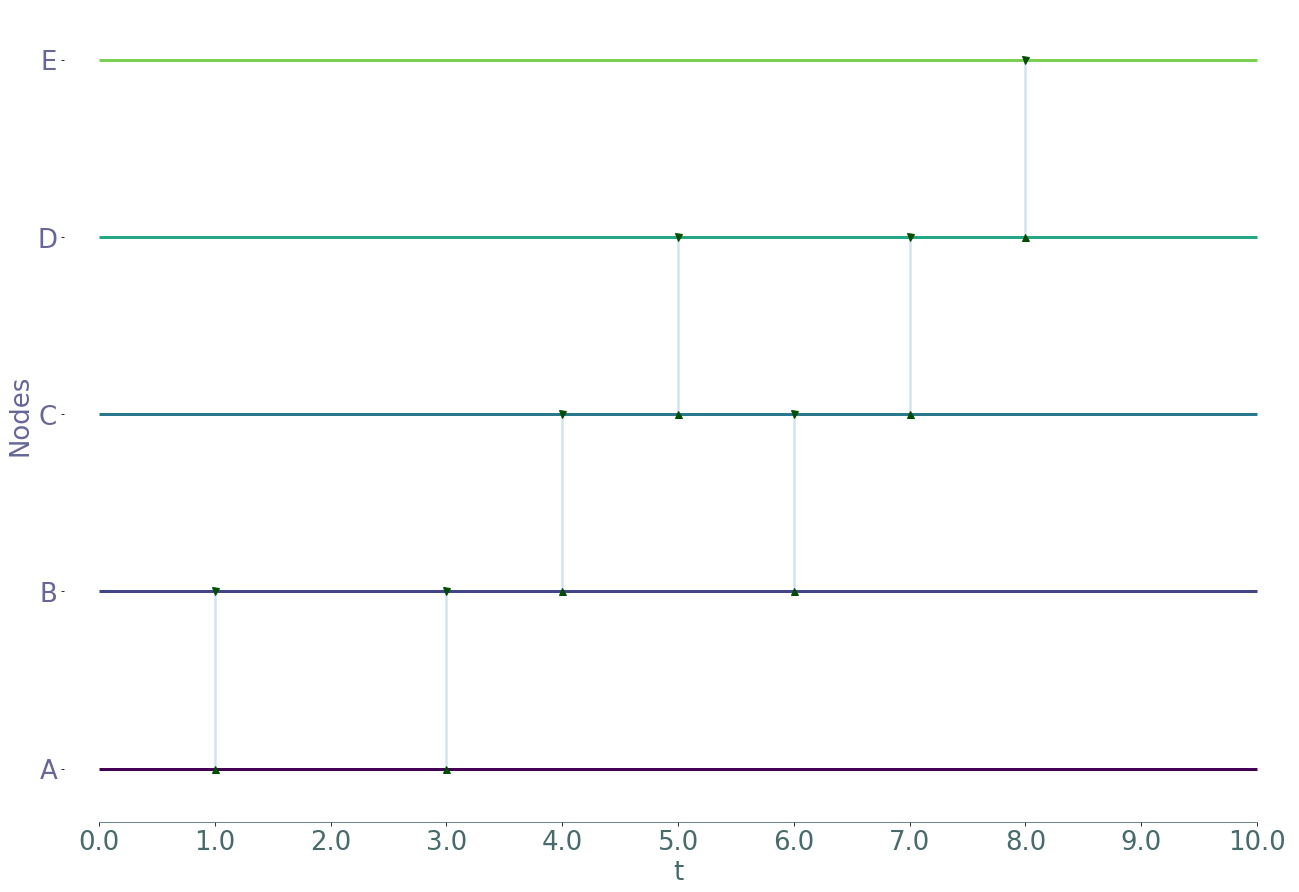

In [38]:
S.plot()

In [39]:
nouveau = S.fragmented_stream_graph()

<AxesSubplot:xlabel='t', ylabel='Nodes'>

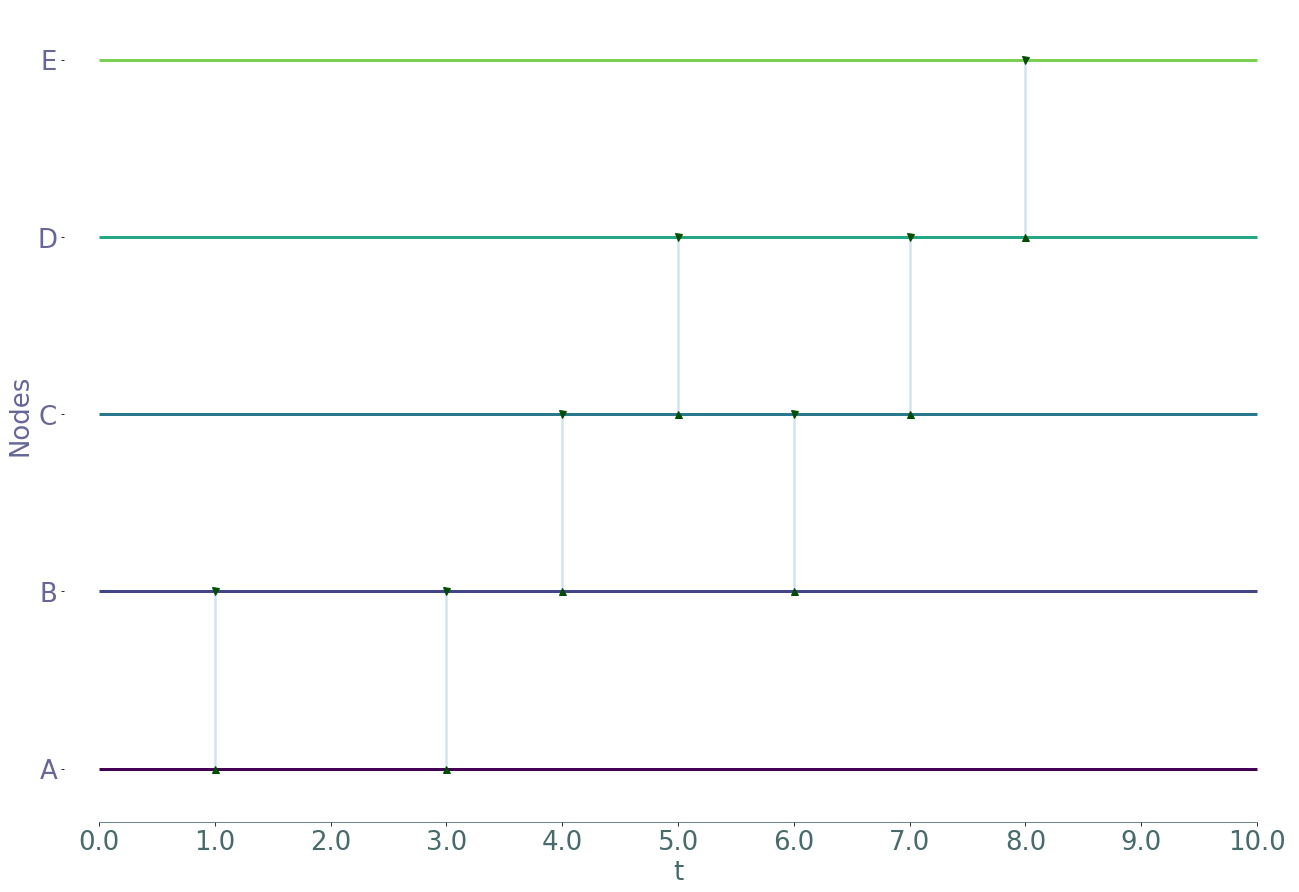

In [40]:
nouveau.plot()

In [41]:
node = 0
l = nouveau.fastest_paths_from_vertex(node)
print("resultat : ")
res2=[]
i=0
for el in l:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res2.append(ee)
print(i)

resultat : 
 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
7


In [42]:
for e in res2:
    if e.passes_through(3.5,1):
        print(e)

 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴


In [43]:
for e in l:
    print(e.keys())

dict_keys([])
dict_keys([(1.0, 1.0), (3.0, 3.0)])
dict_keys([(3.0, 4.0)])
dict_keys([(3.0, 5.0)])
dict_keys([(3.0, 8.0)])


In [44]:
nouveau.betweenness_temporal_node(3.5,1)

all_fastest [[set(), { 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹,  0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴,  0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴,  0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴}], [set(), set(), { 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹,  1 (6.0, 6.0) 2 | volume = 1.0 + 0.0·x¹}, { 1 (6.0, 6.0) 2 (7.0, 7.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²,  1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²}, { 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³}], [set(), set(), set(), { 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹,  2 (7.0, 7.0) 3 | volume = 1.0 + 0.0·x¹}

0